### Importing the required libraries

In [15]:
import os
import requests
from pathlib import Path
import zipfile
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image

### Data Ingestion and Unzipping

In [2]:
url = "https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip"
save_dir = Path("../data/Deep_Learning")

os.makedirs(save_dir, exist_ok = True)

file_path = os.path.join(save_dir, "dataset.zip")

# Download the file
if not os.path.exists(path = save_dir):
    response = requests.get(url = url, stream = True)
    if response.status_code == 200:
        with open(file_path, "wb") as f:
            for chunk in response.iter_content(chunk_size = 8192):
                f.write(chunk)
        print(f"Dataset download successfully and saved to {file_path}.")
    else:
        print(f"Failed to download the dataset. HTTP status code: {response.status_code}")
else:
    print(f"Dataset is already downloaded at: {file_path}")

Dataset is already downloaded at: ..\data\Deep_Learning\dataset.zip


In [3]:
# Define the file path and the extraction directory
extract_dir = os.path.join(save_dir, "cats_and_dogs")

# Unzip the file
if not os.path.exists(extract_dir):
    with zipfile.ZipFile(file_path, "r") as zip_ref:
        zip_ref.extractall(path = extract_dir)
        print("Dataset successfully extracted!")
else:
    print("Extracted File already exists.")

Extracted File already exists.


### Data Exploration

In [4]:
base_dir = Path("../data/Deep_Learning/cats_and_dogs/cats_and_dogs_filtered")

print("Contents of base directory: ")
print(os.listdir(base_dir))

print("Contents of Train directory: ")
print(os.listdir(f"{base_dir}/train"))

print("Contents of Validation directory: ")
print(os.listdir(f"{base_dir}/validation"))

Contents of base directory: 
['train', 'validation', 'vectorize.py']
Contents of Train directory: 
['cats', 'dogs']
Contents of Validation directory: 
['cats', 'dogs']


Defining the names of the folders using the os library.

In [5]:
train_dir = os.path.join(base_dir, "train")
validation_dir = os.path.join(base_dir, "validation")

train_dogs_dir = os.path.join(train_dir, "dogs")
train_cats_dir = os.path.join(train_dir, "cats")

validation_dogs_dir = os.path.join(validation_dir, "dogs")
validation_cats_dir = os.path.join(validation_dir, "cats")

In [6]:
train_cat_fnames = os.listdir(train_cats_dir)
train_dog_fnames = os.listdir(train_dogs_dir)

In [7]:
print("Total training dog images: ", len(os.listdir(train_dogs_dir)))
print("Total training cat images: ", len(os.listdir(train_cats_dir)))

print("Total validation dog images: ",len(os.listdir(validation_dogs_dir)))
print("Total validation cat images: ",len(os.listdir(validation_cats_dir)))

Total training dog images:  1000
Total training cat images:  1000
Total validation dog images:  500
Total validation cat images:  500


In [19]:
image_dir = os.path.join(base_dir, "train", "cats")

for i, img_name in enumerate(os.listdir(image_dir)):
    img_path = os.path.join(image_dir, img_name)
    try:
        if i < 5:
            with Image.open(img_path) as img:
                print(f"Image name: {img_name}, Image size: {img.size}")
                i += 1
        else:
            break
    except Exception as e:
        print(f"Could not process {img_name}: {e}")

Image name: cat.0.jpg, Image size: (500, 374)
Image name: cat.1.jpg, Image size: (300, 280)
Image name: cat.10.jpg, Image size: (489, 499)
Image name: cat.100.jpg, Image size: (403, 499)
Image name: cat.101.jpg, Image size: (296, 200)


### Visualization

In [ ]:
# Number of columns and rows
nrows = 4
ncols = 4

pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

# Visualiznig 8 images from each cateory
pic_index += 8
next_cat_pic = [os.path.join(train_cats_dir, fname) for fname in train_cat_fnames[pic_index-8: pic_index]]
next_dog_pic = [os.path.join(train_dogs_dir, fname) for fname in train_dog_fnames[pic_index-8: pic_index]]

plt.figure(figsize = (10, 10))
for i, img_path in enumerate(next_cat_pic + next_dog_pic):

  sp = plt.subplot(nrows, ncols, i+1)
  sp.axis("off")

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

### Custom Dataset

In [9]:
from torchvision.datasets import ImageFolder
from torchvision import transforms

In [34]:
transform = transforms.Compose([
    transforms.Resize((200, 200)),
    transforms.ToTensor()
])

train_dataset = ImageFolder(train_dir, transform = transform)
val_dataset = ImageFolder(validation_dir, transform = transform)

In [24]:
def image_label(idx: int):
    img, label = train_dataset[idx]
    print(f"Shape of the Image: {img.shape}, Label: {label}")

Labels:
- 0: Cats
- 1: Dogs

In [27]:
image_label(idx = 637)
image_label(idx = 1287)

Shape of the Image: torch.Size([3, 200, 200]), Label: 0
Shape of the Image: torch.Size([3, 200, 200]), Label: 1


In [32]:
def show_example(idx: int):

    img, label = train_dataset[idx]

    print(f"Label of the image with the index {idx}: {train_dataset.classes[label]}({str(label)}).")

    # The image is in (C x H x W) format, so permute it to H x W x C for proper display
    # `permute(1, 2, 0)` changes the order of dimensions: from (C, H, W) to (H, W, C)
    # This is necessary because matplotlib expects the color channels to be the last dimension.
    plt.imshow(img.permute(1, 2, 0))
    plt.xticks([])
    plt.yticks([])

Label of the image with the index 0: cats(0).


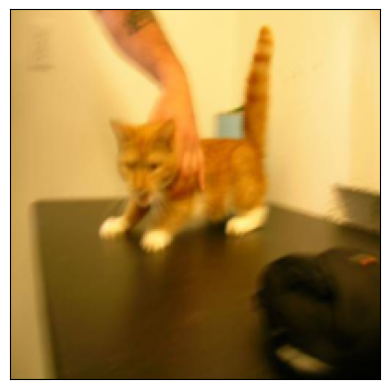

In [33]:
show_example(idx = 0)